In [1]:
import pickle
from matplotlib import pyplot as plt
import numpy as np
import json
from sklearn.metrics.pairwise import euclidean_distances
import cv2

In [2]:
matlab_points = pickle.load(open('/root/data/alok/biomass_estimation/playground/image_to_checkerboard_points_matlab.pkl', 'rb'))
circular_points = pickle.load(open('/root/data/alok/biomass_estimation/playground/image_to_checkerboard_points_circular.pkl', 'rb'))

In [3]:
matlab_left = matlab_points['/data/alok/biomass_estimation/playground/validation_images/left/left_frame.png']['left_corners']
matlab_right = matlab_points['/data/alok/biomass_estimation/playground/validation_images/left/left_frame.png']['right_corners']
circular_left = circular_points['/data/alok/biomass_estimation/playground/validation_images/left/left_frame.png']['left_corners']
circular_right = circular_points['/data/alok/biomass_estimation/playground/validation_images/left/left_frame.png']['right_corners']

In [4]:
(matlab_left - matlab_right) - (circular_left - circular_right)

array([[10.954468  ,  4.1346436 ],
       [10.269287  ,  3.8930664 ],
       [ 9.444336  ,  3.5603027 ],
       [ 8.714844  ,  3.3572998 ],
       [ 8.246094  ,  2.9980469 ],
       [ 7.8615723 ,  2.9022217 ],
       [ 7.6499023 ,  2.647705  ],
       [ 7.4177246 ,  2.347046  ],
       [ 7.265625  ,  2.25354   ],
       [10.570801  ,  3.524292  ],
       [ 9.923096  ,  3.1063232 ],
       [ 9.061035  ,  2.8690186 ],
       [ 8.429443  ,  2.6289062 ],
       [ 7.9296875 ,  2.3500977 ],
       [ 7.6123047 ,  2.2734375 ],
       [ 7.531494  ,  2.0325928 ],
       [ 7.350342  ,  2.050171  ],
       [ 7.199951  ,  1.895752  ],
       [10.061279  ,  2.8533936 ],
       [ 9.57251   ,  2.416504  ],
       [ 8.853027  ,  2.1820068 ],
       [ 8.286133  ,  1.9515381 ],
       [ 7.817871  ,  1.7268066 ],
       [ 7.5893555 ,  1.7301025 ],
       [ 7.4538574 ,  1.6607666 ],
       [ 7.3459473 ,  1.6035156 ],
       [ 7.185791  ,  1.4637451 ],
       [ 9.514282  ,  2.5871582 ],
       [ 9.155151  ,

In [5]:
matlab_wcm = pickle.load(open('/root/data/alok/biomass_estimation/playground/wcm_matlab.pkl', 'rb'))
circular_wcm = pickle.load(open('/root/data/alok/biomass_estimation/playground/wcm_circular.pkl', 'rb'))

In [6]:
diffs = np.squeeze(1e3 * (euclidean_distances(world_coordinate_matrix_matlab) - euclidean_distances(world_coordinate_matrix_circular))).flatten()

NameError: name 'world_coordinate_matrix_matlab' is not defined

In [ ]:
ds = []
for i in range(world_coordinate_matrix_matlab.shape[0]):
    for j in range(i+1, world_coordinate_matrix_matlab.shape[0]):
        d = np.linalg.norm(world_coordinate_matrix_matlab[i, :] - world_coordinate_matrix_matlab[j, :])
        ds.append(d)
        
ds = np.array(ds)
diffs = 1e3 * ds - matlab_df.ground_truth_distance_mms.values
plt.hist(diffs)
plt.show()

In [7]:
circular_params

NameError: name 'circular_params' is not defined

In [8]:
ds = []
for i in range(world_coordinate_matrix_circular.shape[0]):
    for j in range(i+1, world_coordinate_matrix_circular.shape[0]):
        d = np.linalg.norm(world_coordinate_matrix_circular[i, :] - world_coordinate_matrix_circular[j, :])
        ds.append(d)
        
ds = np.array(ds)
diffs = 1e3 * ds - circular_df.ground_truth_distance_mms.values
plt.hist(diffs)
plt.show()

NameError: name 'world_coordinate_matrix_circular' is not defined

In [9]:
diffs = np.squeeze(1e3 * (euclidean_distances(matlab_wcm[0]) - euclidean_distances(circular_wcm[0]))).flatten()

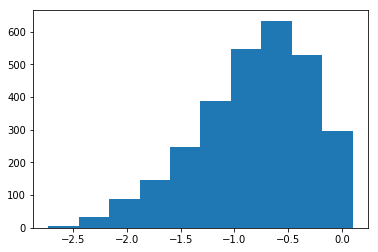

In [10]:
plt.hist(diffs)
plt.show()

In [11]:
matlab_params = json.load(open('/root/data/alok/biomass_estimation/playground/2020-01-14T00_00_00Z_L40013180_R40029775_stereo-parameters.json'))
circular_params = json.load(open('/root/data/alok/biomass_estimation/playground/EstimatedStereoCamParams_L40013180_R40029775.json'))

In [12]:
matlab_params['TranslationOfCamera2']

[-101.86575621148499, 0.23046783888323713, -0.22711748873619628]

In [13]:
circular_params['TranslationOfCamera2']

[-101.52658650444619, 0.013589897060778334, -0.4112342205486619]

In [27]:
matlab_params['CameraParameters1']['FocalLength']

[4006.8671136444264, 4006.9961543771137]

In [14]:
circular_params['CameraParameters1']['FocalLength']

[3995.5062171346935, 3995.5062171346935]

In [15]:
(matlab_params['CameraParameters1']['FocalLength'][0] * matlab_params['TranslationOfCamera2'][0]) / 608

-671.3199812011836

In [16]:
circular_params['CameraParameters1']['FocalLength'][0] * circular_params['TranslationOfCamera2'][0] / 600

-676.0835126382967

In [17]:
matlab_df = pickle.load(open('/root/data/alok/biomass_estimation/playground/analysis_df_matlab.pkl', 'rb'))
circular_df = pickle.load(open('/root/data/alok/biomass_estimation/playground/analysis_df_circular.pkl', 'rb'))

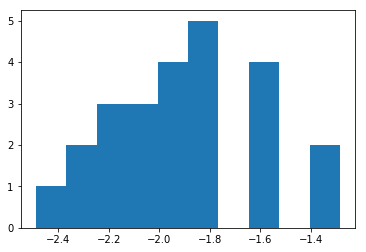

In [31]:
plt.hist(matlab_df[matlab_df.ground_truth_distance_mms > 400].predicted_distance_mms - circular_df[matlab_df.ground_truth_distance_mms > 400].predicted_distance_mms)
plt.show()

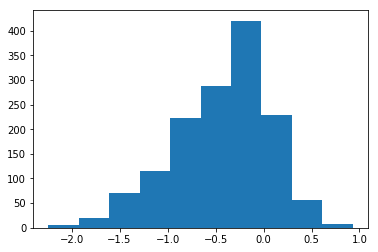

In [19]:
plt.hist(matlab_df.predicted_distance_mms - matlab_df.ground_truth_distance_mms)
plt.show()

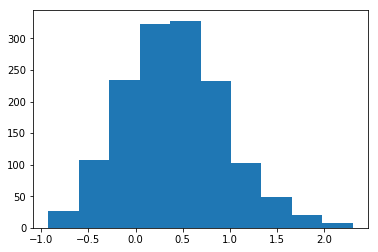

In [20]:
plt.hist(circular_df.predicted_distance_mms - circular_df.ground_truth_distance_mms)
plt.show()

In [21]:
((0.605)**3 - (0.60)**3) / (0.60)**3

0.025208912037037148

In [22]:
circular_cameraMatrix1 = np.array(circular_params['CameraParameters1']['IntrinsicMatrix']).transpose() 
circular_cameraMatrix2 = np.array(circular_params['CameraParameters2']['IntrinsicMatrix']).transpose()

In [23]:
matlab_cameraMatrix1 = np.array(matlab_params['CameraParameters1']['IntrinsicMatrix']).transpose() 
matlab_cameraMatrix2 = np.array(matlab_params['CameraParameters2']['IntrinsicMatrix']).transpose()
R = np.array(matlab_params['RotationOfCamera2']).transpose()
T = np.array(matlab_params['TranslationOfCamera2']).transpose()
world_checkerboard_points_list = []
for left_corners, right_corners in zip(matlab_left, matlab_right):
    P1 = np.dot(matlab_cameraMatrix1, np.hstack([np.eye(3), np.array([[0], [0], [0]])]))
    P2 = np.dot(matlab_cameraMatrix2, np.hstack([R, T[:, np.newaxis]]))
    wcp = cv2.triangulatePoints(P1, P2, left_corners, right_corners).T
    world_checkerboard_points = wcp[:,:3] / wcp[:,3, None]
    world_checkerboard_points_list.append(world_checkerboard_points)
    
world_coordinate_matrix_matlab = np.empty([len(world_checkerboard_points_list), 3])
for i, world_checkerboard_points in enumerate(world_checkerboard_points_list):
        world_coordinate_matrix_matlab[i, :] = world_checkerboard_points

world_coordinate_matrix_matlab = np.array([world_coordinate_matrix_matlab[:, 0],
                                           world_coordinate_matrix_matlab[:, 2],
                                           -world_coordinate_matrix_matlab[:, 1]]).T * 1e-3

In [24]:
circular_cameraMatrix1 = np.array(circular_params['CameraParameters1']['IntrinsicMatrix']).transpose() 
circular_cameraMatrix2 = np.array(circular_params['CameraParameters2']['IntrinsicMatrix']).transpose()
R = np.array(circular_params['RotationOfCamera2']).transpose()
T = np.array(circular_params['TranslationOfCamera2']).transpose()
world_checkerboard_points_list = []
for left_corners, right_corners in zip(circular_left, circular_right):
    P1 = np.dot(circular_cameraMatrix1, np.hstack([np.eye(3), np.array([[0], [0], [0]])]))
    P2 = np.dot(circular_cameraMatrix2, np.hstack([R, T[:, np.newaxis]]))
    wcp = cv2.triangulatePoints(P1, P2, left_corners, right_corners).T
    world_checkerboard_points = wcp[:,:3] / wcp[:,3, None]
    world_checkerboard_points_list.append(world_checkerboard_points)
    
world_coordinate_matrix_circular = np.empty([len(world_checkerboard_points_list), 3])
for i, world_checkerboard_points in enumerate(world_checkerboard_points_list):
        world_coordinate_matrix_circular[i, :] = world_checkerboard_points

world_coordinate_matrix_circular = np.array([world_coordinate_matrix_circular[:, 0],
                                             world_coordinate_matrix_circular[:, 2],
                                             -world_coordinate_matrix_circular[:, 1]]).T * 1e-3

In [25]:
(world_coordinate_matrix_circular - circular_wcm) * 1e3

array([[[-2.32595023,  5.50627427, -5.43812508],
        [-2.19191768,  4.81431416, -5.85010845],
        [-2.1807432 ,  4.08065554, -6.20523072],
        [-2.2857273 ,  3.29779896, -6.53145478],
        [-2.49953068,  2.47673201, -6.8620747 ],
        [-2.81640564,  1.61362122, -7.15079712],
        [-3.23746216,  0.70860163, -7.46763039],
        [-3.75150179, -0.23668868, -7.74778179],
        [-4.3568865 , -1.22299644, -8.0472123 ],
        [-2.39794112,  5.80094971, -5.79397264],
        [-2.2273119 ,  5.15873918, -6.08647007],
        [-2.17412211,  4.46619455, -6.37323403],
        [-2.23361651,  3.72755507, -6.65329625],
        [-2.39974109,  2.95066808, -6.92377401],
        [-2.66790366,  2.13704528, -7.17041771],
        [-3.03550562,  1.27876353, -7.41451924],
        [-3.4947781 ,  0.3808137 , -7.65673951],
        [-4.04652899, -0.56044438, -7.89008216],
        [-2.47878314,  6.0875983 , -6.19421179],
        [-2.27132936,  5.48686671, -6.41129165],
        [-2.17850953

{'CameraParameters1': {'ImageSize': [3000, 4096],
  'RadialDistortion': [-0.04178095615560425,
   0.09363428569637461,
   -0.013392604980082958],
  'TangentialDistortion': [0, 0],
  'WorldPoints': [[0, 0],
   [0, 49.294],
   [0, 98.588],
   [0, 147.882],
   [0, 197.176],
   [0, 246.46999999999997],
   [49.294, 0],
   [49.294, 49.294],
   [49.294, 98.588],
   [49.294, 147.882],
   [49.294, 197.176],
   [49.294, 246.46999999999997],
   [98.588, 0],
   [98.588, 49.294],
   [98.588, 98.588],
   [98.588, 147.882],
   [98.588, 197.176],
   [98.588, 246.46999999999997],
   [147.882, 0],
   [147.882, 49.294],
   [147.882, 98.588],
   [147.882, 147.882],
   [147.882, 197.176],
   [147.882, 246.46999999999997],
   [197.176, 0],
   [197.176, 49.294],
   [197.176, 98.588],
   [197.176, 147.882],
   [197.176, 197.176],
   [197.176, 246.46999999999997],
   [246.46999999999997, 0],
   [246.46999999999997, 49.294],
   [246.46999999999997, 98.588],
   [246.46999999999997, 147.882],
   [246.469999999999